In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium
import plotly.graph_objects as go
import seaborn as sns
import ipywidgets as widgets

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, HTML

In [2]:
vaccination_df=pd.read_csv('https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_global.csv')

In [3]:
vaccination_df

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,Province_State
0,Canada,2020-12-14,5.000000e+00,0.000000e+00,0.000000e+00,2020-12-14,124.0,NaN
1,World,2020-12-14,5.000000e+00,0.000000e+00,0.000000e+00,2020-12-14,NaN,NaN
2,Canada,2020-12-15,7.230000e+02,0.000000e+00,0.000000e+00,2020-12-15,124.0,NaN
3,China,2020-12-15,1.500000e+06,0.000000e+00,0.000000e+00,2020-12-15,156.0,NaN
4,Russia,2020-12-15,2.850000e+04,2.850000e+04,0.000000e+00,2020-12-15,643.0,NaN
...,...,...,...,...,...,...,...,...
236432,West Bank and Gaza,2022-05-20,3.720221e+06,NaN,NaN,2022-05-21,275.0,NaN
236433,World,2022-05-20,1.144410e+10,4.941409e+09,4.492469e+09,2022-05-21,NaN,NaN
236434,Yemen,2022-05-20,8.286870e+05,6.630040e+05,4.256190e+05,2022-05-21,887.0,NaN
236435,Zambia,2022-05-20,3.478542e+06,3.240892e+06,2.781327e+06,2022-05-21,894.0,NaN


In [4]:
vaccination_df.fillna(0, inplace = True)
vaccination_df.drop(vaccination_df.index[vaccination_df['Country_Region'] == 'India'], inplace = True)

In [5]:
vaccination_df_GERMANY = vaccination_df[vaccination_df["Country_Region"] == 'Germany']
vaccination_df_GERMANY

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,Province_State
97,Germany,2020-12-27,24474.0,24463.0,11.0,2020-12-27,276.0,0
124,Germany,2020-12-28,42815.0,42804.0,11.0,2020-12-28,276.0,0
159,Germany,2020-12-29,92364.0,91764.0,600.0,2020-12-29,276.0,0
195,Germany,2020-12-30,154904.0,154300.0,604.0,2020-12-30,276.0,0
235,Germany,2020-12-31,204999.0,204255.0,744.0,2020-12-31,276.0,0
...,...,...,...,...,...,...,...,...
235974,Germany,2022-05-20,7283661.0,0.0,0.0,2022-05-21,27613.0,Sachsen
235975,Germany,2022-05-20,4423034.0,0.0,0.0,2022-05-21,27614.0,Sachsen-Anhalt
235976,Germany,2022-05-20,6962111.0,0.0,0.0,2022-05-21,27615.0,Schleswig-Holstein
235977,Germany,2022-05-20,4085463.0,0.0,0.0,2022-05-21,27616.0,Thuringen


In [6]:
vaccination_df_GERMANY.drop(vaccination_df_GERMANY.index[vaccination_df_GERMANY['People_fully_vaccinated'] == 0], inplace = True)

C:\Users\Abhishek Padir\AppData\Local\Temp\ipykernel_7184\2586574538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccination_df_GERMANY.drop(vaccination_df_GERMANY.index[vaccination_df_GERMANY['People_fully_vaccinated'] == 0], inplace = True)


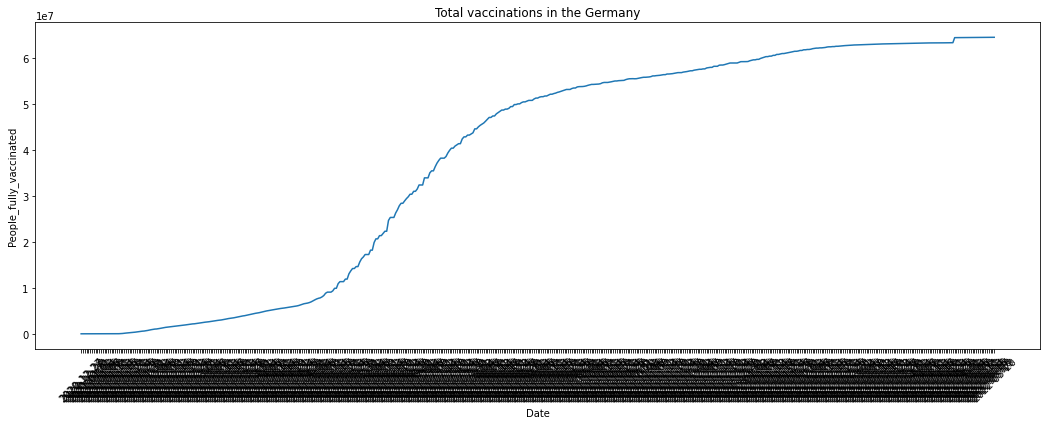

In [7]:
plt.figure(figsize=(18,6))
sns.lineplot(data=vaccination_df_GERMANY, x="Date", y="People_fully_vaccinated")
plt.title("Total vaccinations in the Germany")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Daily vaccinations in the Germany')

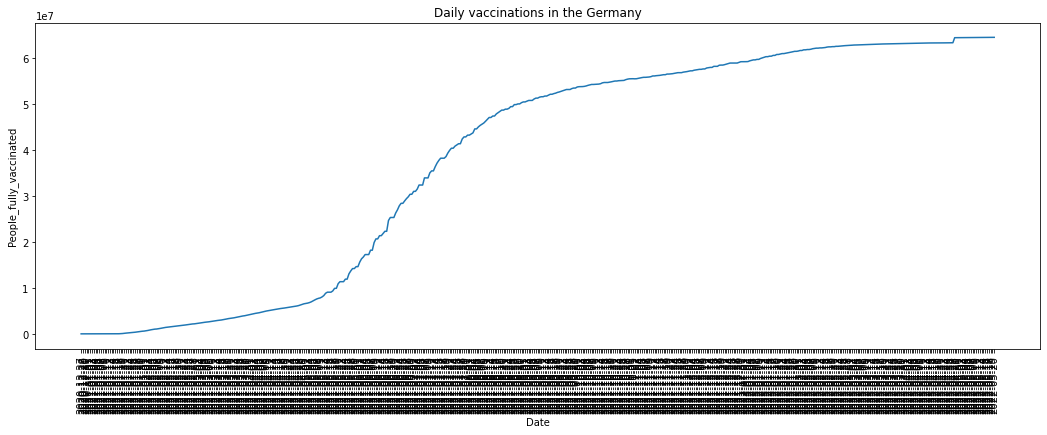

In [8]:
plt.figure(figsize=(18,6))
sns.lineplot(data=vaccination_df_GERMANY, x="Date", y="People_fully_vaccinated")

plt.xticks(rotation=90)
plt.title("Daily vaccinations in the Germany")

In [9]:
vaccination2_df_GERMANY = vaccination_df[vaccination_df["Country_Region"] == 'Germany'].head(1000)
vaccination2_df_GERMANY

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,Province_State
97,Germany,2020-12-27,24474.0,24463.0,11.0,2020-12-27,276.0,0
124,Germany,2020-12-28,42815.0,42804.0,11.0,2020-12-28,276.0,0
159,Germany,2020-12-29,92364.0,91764.0,600.0,2020-12-29,276.0,0
195,Germany,2020-12-30,154904.0,154300.0,604.0,2020-12-30,276.0,0
235,Germany,2020-12-31,204999.0,204255.0,744.0,2020-12-31,276.0,0
...,...,...,...,...,...,...,...,...
121111,Germany,2021-12-05,9444350.0,0.0,0.0,2021-12-06,27607.0,Hessen
121112,Germany,2021-12-05,2398813.0,0.0,0.0,2021-12-06,27608.0,Mecklenburg-Vorpommern
121113,Germany,2021-12-05,12451877.0,0.0,0.0,2021-12-06,27609.0,Niedersachsen
121114,Germany,2021-12-05,29077204.0,0.0,0.0,2021-12-06,27610.0,Nordrhein-Westfalen


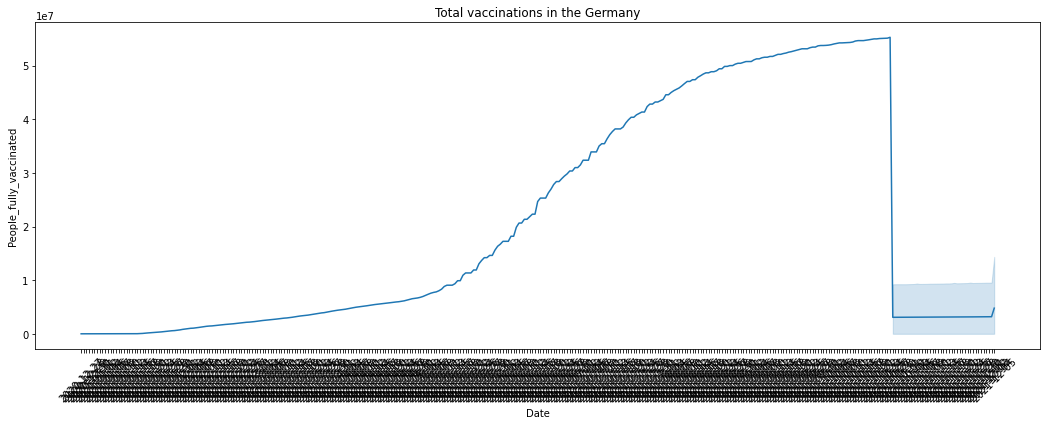

In [10]:
plt.figure(figsize=(18,6))
sns.lineplot(data=vaccination2_df_GERMANY, x="Date", y="People_fully_vaccinated")
plt.title("Total vaccinations in the Germany")
plt.xticks(rotation=45)
plt.show()

In [11]:
vaccination_df_CHINA = vaccination_df[vaccination_df["Country_Region"] == 'China']
vaccination_df_CHINA

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,Province_State
3,China,2020-12-15,1.500000e+06,0.000000e+00,0.000000e+00,2020-12-15,156.0,0
7,China,2020-12-16,1.500000e+06,0.000000e+00,0.000000e+00,2020-12-16,156.0,0
11,China,2020-12-17,1.500000e+06,0.000000e+00,0.000000e+00,2020-12-17,156.0,0
15,China,2020-12-18,1.500000e+06,0.000000e+00,0.000000e+00,2020-12-18,156.0,0
19,China,2020-12-19,1.500000e+06,0.000000e+00,0.000000e+00,2020-12-19,156.0,0
...,...,...,...,...,...,...,...,...
235171,China,2022-05-19,1.657283e+07,0.000000e+00,0.000000e+00,2022-05-20,344.0,Hong Kong
235172,China,2022-05-19,1.389526e+06,0.000000e+00,0.000000e+00,2022-05-20,446.0,Macau
235844,China,2022-05-20,3.399003e+09,1.287195e+09,1.252592e+09,2022-05-21,156.0,0
235845,China,2022-05-20,1.661640e+07,0.000000e+00,0.000000e+00,2022-05-21,344.0,Hong Kong


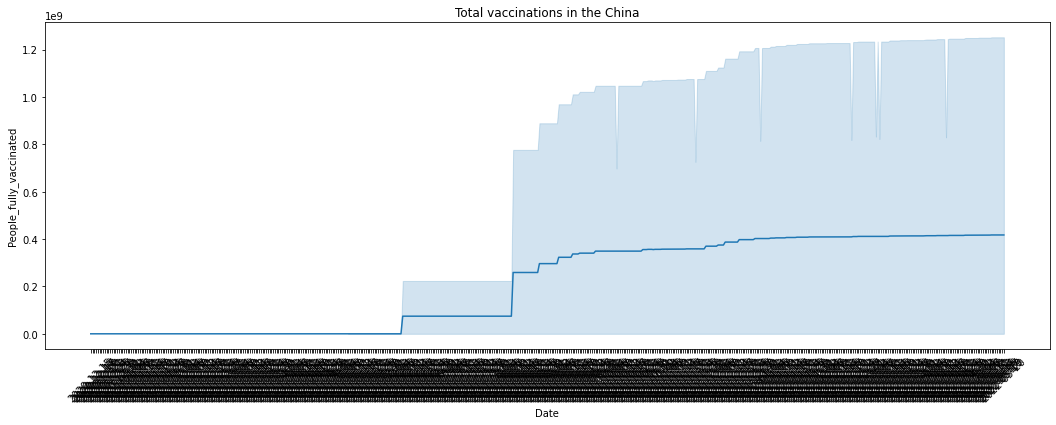

In [18]:
plt.figure(figsize=(18,6))
sns.lineplot(data=vaccination_df_CHINA, x="Date", y="People_fully_vaccinated")
plt.title("Total vaccinations in the China")
plt.xticks(rotation=45)
plt.show()

In [20]:
vaccination_df_ITALY = vaccination_df[vaccination_df["Country_Region"] == 'Italy']
vaccination_df_ITALY

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,Province_State
99,Italy,2020-12-27,7177.0,7177.0,0.0,2020-12-27,380.0,0
128,Italy,2020-12-28,8602.0,8602.0,0.0,2020-12-28,380.0,0
163,Italy,2020-12-29,9611.0,9611.0,0.0,2020-12-29,380.0,0
200,Italy,2020-12-30,14339.0,14339.0,0.0,2020-12-30,380.0,0
241,Italy,2020-12-31,39821.0,39821.0,0.0,2020-12-31,380.0,0
...,...,...,...,...,...,...,...,...
236085,Italy,2022-05-20,10423474.0,0.0,0.0,2022-05-21,38019.0,Sicilia
236086,Italy,2022-05-20,8816723.0,0.0,0.0,2022-05-21,38009.0,Toscana
236087,Italy,2022-05-20,2037770.0,0.0,0.0,2022-05-21,38010.0,Umbria
236088,Italy,2022-05-20,278390.0,0.0,0.0,2022-05-21,38002.0,Valle d'Aosta


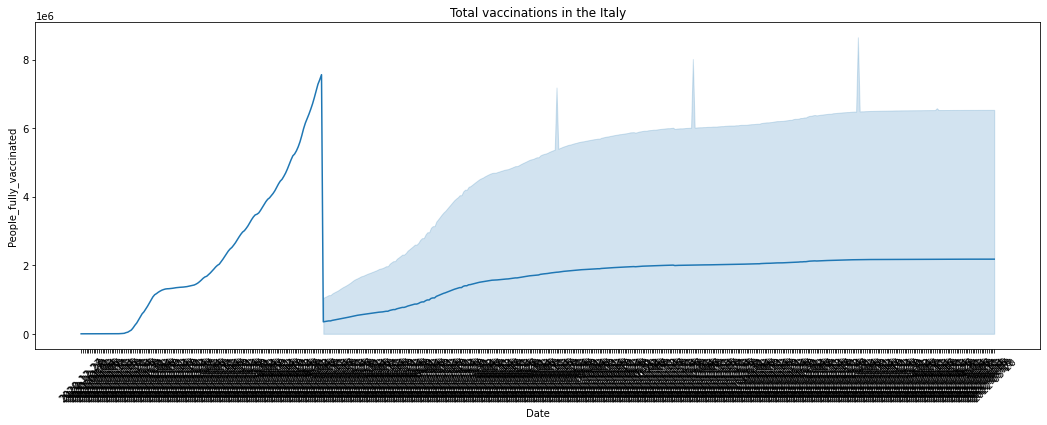

In [21]:
plt.figure(figsize=(18,6))
sns.lineplot(data=vaccination_df_ITALY, x="Date", y="People_fully_vaccinated")
plt.title("Total vaccinations in the Italy")
plt.xticks(rotation=45)
plt.show()

In [24]:
vaccination_df_WORLD = vaccination_df[vaccination_df["Country_Region"] == 'World']
vaccination_df_WORLD

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,Province_State
1,World,2020-12-14,5.000000e+00,0.000000e+00,0.000000e+00,2020-12-14,0.0,0
5,World,2020-12-15,1.529223e+06,2.850000e+04,0.000000e+00,2020-12-15,0.0,0
9,World,2020-12-16,1.531523e+06,2.850000e+04,0.000000e+00,2020-12-16,0.0,0
13,World,2020-12-17,1.535702e+06,2.850000e+04,0.000000e+00,2020-12-17,0.0,0
17,World,2020-12-18,1.539674e+06,2.850000e+04,0.000000e+00,2020-12-18,0.0,0
...,...,...,...,...,...,...,...,...
233737,World,2022-05-16,1.142144e+10,4.938487e+09,4.485525e+09,2022-05-17,0.0,0
234411,World,2022-05-17,1.142685e+10,4.939030e+09,4.486183e+09,2022-05-18,0.0,0
235085,World,2022-05-18,1.143204e+10,4.939706e+09,4.488201e+09,2022-05-19,0.0,0
235759,World,2022-05-19,1.144049e+10,4.940352e+09,4.489681e+09,2022-05-20,0.0,0


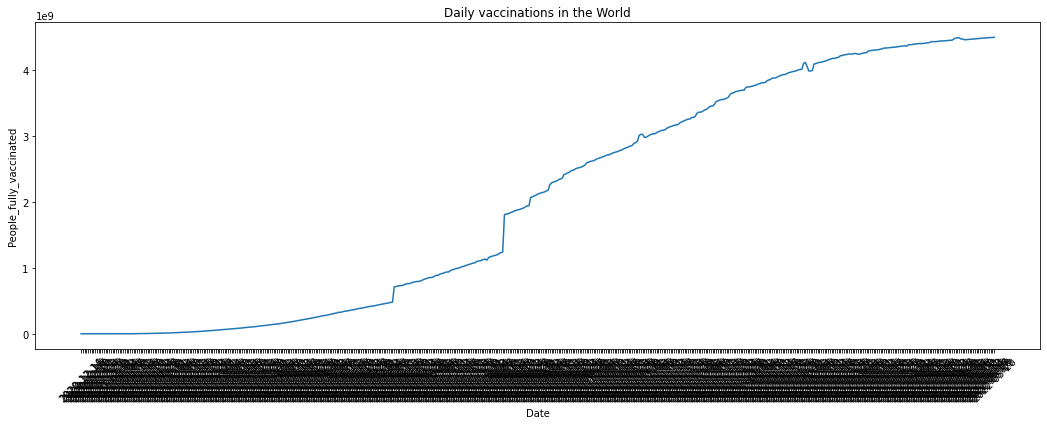

In [30]:
plt.figure(figsize=(18,6))
sns.lineplot(data=vaccination_df_WORLD, x="Date", y="People_fully_vaccinated")
plt.title("Daily vaccinations in the World")
plt.xticks(rotation=45)
plt.show()